In [1]:
import bs4 as bs
import pickle
import requests
import os
import pandas as pd
import numpy as np
import datetime as dt
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

In [2]:
def save_sp500_ticker():
    resp = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, "lxml")
    table = soup.find('table', {'class':'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        tickers.append(ticker)
    with open('spxTickers.pickle', 'wb') as f:
        pickle.dump(tickers, f)
    
    #print(tickers)
    
    return tickers

In [3]:
def get_data_from_yahoo(reload_sp500=False):
    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open('spxTickers.pickle', 'rb') as f:
            tickers = pickle.load(f)
            
    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')
    
    start = dt.datetime(2013, 1, 1)
    end = dt.datetime.now()
    
    ntikers = len(tickers)
    aux = 1
    for ticker in tickers:
        print(aux,"of",ntikers, ticker)
        if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
            df = web.DataReader(ticker, 'iex', start, end)
            df.to_csv('stock_dfs/{}.csv'.format(ticker))
        else:
            print('Already have {}'.format(ticker))
        aux+=1

In [89]:
get_data_from_yahoo()

1 of 505 MMM
5y
2 of 505 ABT
5y
3 of 505 ABBV
5y
4 of 505 ABMD
5y
5 of 505 ACN
5y
6 of 505 ATVI
5y
7 of 505 ADBE
5y
8 of 505 AMD
5y
9 of 505 AAP
5y
10 of 505 AES
5y
11 of 505 AET
5y
12 of 505 AMG
5y
13 of 505 AFL
5y
14 of 505 A
5y
15 of 505 APD
5y
16 of 505 AKAM
5y
17 of 505 ALK
5y
18 of 505 ALB
5y
19 of 505 ARE
5y
20 of 505 ALXN
5y
21 of 505 ALGN
5y
22 of 505 ALLE
5y
23 of 505 AGN
5y
24 of 505 ADS
5y
25 of 505 LNT
5y
26 of 505 ALL
5y
27 of 505 GOOGL
5y
28 of 505 GOOG
5y
29 of 505 MO
5y
30 of 505 AMZN
5y
31 of 505 AEE
5y
32 of 505 AAL
5y
33 of 505 AEP
5y
34 of 505 AXP
5y
35 of 505 AIG
5y
36 of 505 AMT
5y
37 of 505 AWK
5y
38 of 505 AMP
5y
39 of 505 ABC
5y
40 of 505 AME
5y
41 of 505 AMGN
5y
42 of 505 APH
5y
43 of 505 APC
5y
44 of 505 ADI
5y
45 of 505 ANDV
5y
46 of 505 ANSS
5y
47 of 505 ANTM
5y
48 of 505 AON
5y
49 of 505 AOS
5y
50 of 505 APA
5y
51 of 505 AIV
5y
52 of 505 AAPL
5y
53 of 505 AMAT
5y
54 of 505 APTV
5y
55 of 505 ADM
5y
56 of 505 ARNC
5y
57 of 505 AJG
5y
58 of 505 AIZ
5y
59 of 

459 of 505 UAA
5y
460 of 505 UA
5y
461 of 505 UNP
5y
462 of 505 UAL
5y
463 of 505 UNH
5y
464 of 505 UPS
5y
465 of 505 URI
5y
466 of 505 UTX
5y
467 of 505 UHS
5y
468 of 505 UNM
5y
469 of 505 VFC
5y
470 of 505 VLO
5y
471 of 505 VAR
5y
472 of 505 VTR
5y
473 of 505 VRSN
5y
474 of 505 VRSK
5y
475 of 505 VZ
5y
476 of 505 VRTX
5y
477 of 505 VIAB
5y
478 of 505 V
5y
479 of 505 VNO
5y
480 of 505 VMC
5y
481 of 505 WMT
5y
482 of 505 WBA
5y
483 of 505 DIS
5y
484 of 505 WM
5y
485 of 505 WAT
5y
486 of 505 WEC
5y
487 of 505 WFC
5y
488 of 505 WELL
5y
489 of 505 WDC
5y
490 of 505 WU
5y
491 of 505 WRK
5y
492 of 505 WY
5y
493 of 505 WHR
5y
494 of 505 WMB
5y
495 of 505 WLTW
5y
496 of 505 WYNN
5y
497 of 505 XEL
5y
498 of 505 XRX
5y
499 of 505 XLNX
5y
500 of 505 XL
5y
501 of 505 XYL
5y
502 of 505 YUM
5y
503 of 505 ZBH
5y
504 of 505 ZION
5y
505 of 505 ZTS
5y


In [4]:
def compile_data():
    """this compile all information of all stock files and save that in one file"""
    with open("spxTickers.pickle", "rb") as f:
        tickers = pickle.load(f)
    
    main_df = pd.DataFrame()
    
    for count,ticker in enumerate(tickers):
        df = pd.read_csv('stock_dfs/{}.csv'.format(ticker))
        df.set_index('date', inplace=True)
        
        df.rename(columns = {'close': ticker}, inplace=True)
        df.drop(['open','high','low','volume'], 1, inplace=True)
        
        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df, how='outer')
        
        if count % 10 == 0:
            print(count)
    print(main_df.head())
    main_df.to_csv("sp500_joined_closes.csv")

In [5]:
compile_data()

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
                 MMM      ABT     ABBV   ABMD      ACN     ATVI   ADBE   AMD  \
date                                                                           
2013-08-01  104.7361  33.0259  37.9995  24.15  67.1353  17.6655  47.70  3.81   
2013-08-02  104.6034  32.9452  38.0583  23.03  66.9021  17.5538  47.45  3.80   
2013-08-05  104.3027  32.6763  37.5460  22.64  66.5792  17.2140  47.63  3.82   
2013-08-06  103.9312  32.3625  37.6888  22.49  65.7002  16.9422  47.39  3.72   
2013-08-07  104.2231  32.2101  37.4285  22.05  65.4760  17.0004  47.10  3.69   

                AAP      AES   ...         WYNN      XEL      XRX     XLNX  \
date                           ...                                           
2013-08-01  82.6659  10.8451   ...     120.0015  25.4055  22.7068  41.6598   
2013-08-02  

In [77]:
def visualize_data():
    df = pd.read_csv('sp500_joined_closes.csv')
    #df['AAPL'].plot()
    #plt.show()
    df_corr = df.corr()
    #print(df_corr.head())
    data = df_corr.values
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    heatmap = ax.pcolor(data, cmap=plt.cm.RdYlGn)#RdYlGn)
    fig.colorbar(heatmap)
    
    ax.set_xticks(np.arange(data.shape[0]) + 0.5, minor=False)
    ax.set_yticks(np.arange(data.shape[1]) + 0.5, minor=False)
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    
    column_labels = df_corr.columns
    row_labels = df_corr.index
    
    ax.set_xticklabels(column_labels)
    ax.set_yticklabels(row_labels)
    plt.xticks(rotation=90)
    heatmap.set_clim(-1,1)
    plt.tight_layout()
    plt.show()

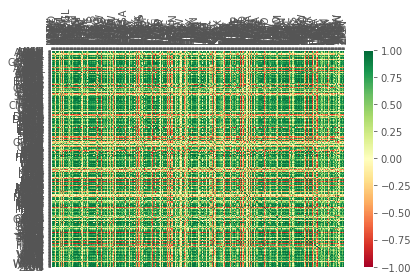

In [78]:
visualize_data()